# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
#hospital_read_df.info() #check

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'] #remove incomplete entries.
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int) #change data type to integer
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')  #sort by number of discharges
#clean_hospital_read_df.info()

C:\Anaconda2\envs\py35\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


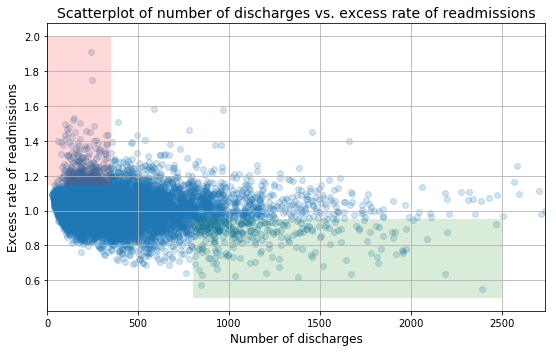

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

### I. Verify the initial claims

**A. Initial observations based on the plot above**  
(1) Claim: Overall, rate of readmissions is trending down with increasing number of discharges  
 - <span style="color:blue">  To calculate pearson correlation coefficient. Generate a box plot to identify outliers. </span>  

(2) Claim: With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)  
 - <span style="color:blue">  To do a hypothesis test along y-axis to determine if the values that exceed 1 are outliers or not. </span>  

(3) Claim: With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)   
 - <span style="color:blue">  To do a hypothesis test along x axis. </span>  

#### (1) Claim: Overall, rate of readmissions is trending down with increasing number of discharges  
(a) Validation approach: To calculate pearson correlation coefficient and generate a box plot to identify outliers.

Pearson_r:  -0.093 and p_value: 1.502e-23


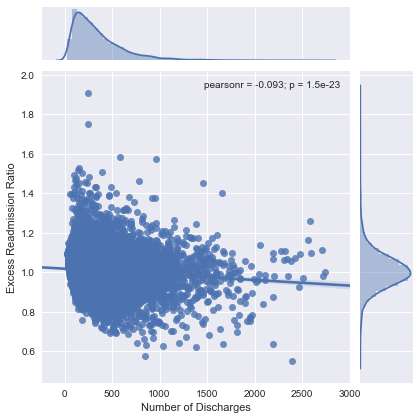

In [6]:
#generate a jointplot using seaborn.
#the jointplot simultaneously calculates Pearson r and p-value

import seaborn as sns

df_x=clean_hospital_read_df['Number of Discharges'][81:-3]
df_y=clean_hospital_read_df['Excess Readmission Ratio'][81:-3]

df_xy=pd.DataFrame()
df_xy=pd.concat([df_xy,df_x,df_y],axis=1) #combine df_x and df_y into a single DataFrame

df_xy.columns=['x','y']

#df_xy.head() #check

df=pd.DataFrame()
df=pd.concat([df,df_x,df_y], axis=1)
df=df.dropna() #remove NaNs

#df.info() #check

#plot data, while simultaneously fitting data to a linear model
#calculating pearson correlation and p-value 
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=df, kind='reg')

#double check the Pearson r using scipy
from scipy.stats import pearsonr 

pearson_r,p_value=pearsonr(df_x,df_y)

print('Pearson_r: ', np.round(pearson_r,3), 'and p_value:', np.round(p_value,26))

- It is seen that the Pearson_r value is close to zero and the p-value is much less than 0.01.
- Both of these imply that there is <b> no correlation </b> between the excess readmission ratio and the number of discharges. 
- To better understand the situation, let's assess the distribution of the data points using boxplots. 

(b) generate boxplots

C:\Anaconda2\envs\py35\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


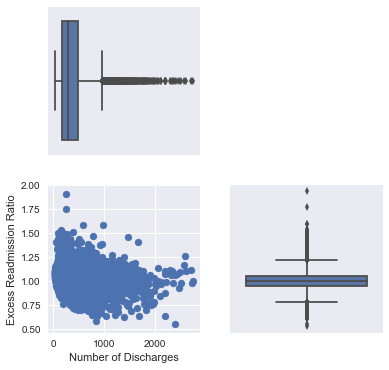

In [7]:
plt.figure(figsize=(6,6))

plt.subplot(2,2,1)
sns.boxplot(df_x, vert=False)
plt.xticks([])
plt.yticks([])
plt.xlabel('')

plt.subplot(2,2,3)
plt.scatter(df_x,df_y)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')

plt.subplot(2,2,4)
sns.boxplot(df_y, vert=True)
plt.xticks([])
plt.yticks([])
plt.ylabel('')

plt.show()

In [8]:
#calculate the medians
print(' Number of Discharges median: %.3f' %(df_x.median()), \
      '\n Excess Readmission Ratio: %.3f' %(df_y.median()))

 Number of Discharges median: 281.000 
 Excess Readmission Ratio: 1.004


- The boxplots reveal that the data are skewed with the medians for number of discarges and excess readmission ratio being 281 and 1, respectively. Most data occur in the proximity of the median values.

- In other words, the variation across the x- and the y-axes are non-uniform. The outliers falsely lead to the impression that the x and the y parameters are dependent.

#### (2) Claim: With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)  
(a) Validation approach: Filter dataset for just those within the red region and calculate Pearson r and p-value 
to determine if the values that exceed 1 are outliers or not.

In [9]:
#Get only data in the red region

df_x_red=df_x[df_x<=350]
df_y_red=df_y[(df_y>=1.15)&(df_y<=2)]

#inspect data
print(' df_x:',df_x_red.describe()) #check
print('\n df_y:',df_y_red.describe()) #check


 df_x: count    7009.000000
mean      189.380653
std        83.425250
min        25.000000
25%       118.000000
50%       184.000000
75%       258.000000
max       350.000000
Name: Number of Discharges, dtype: float64

 df_y: count    620.000000
mean       1.225168
std        0.083589
min        1.150000
25%        1.170550
50%        1.198350
75%        1.247925
max        1.909500
Name: Excess Readmission Ratio, dtype: float64


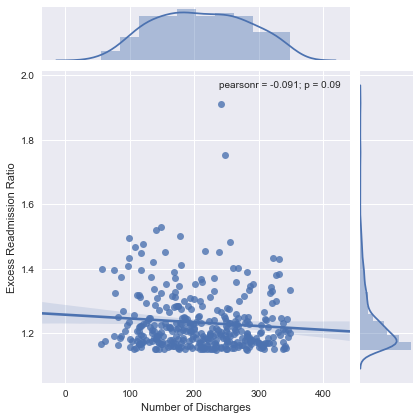

In [10]:
#calculate pearson_r and p-value to determine if there is a correlation between the two variables 

sns.jointplot(df_x_red,df_y_red, kind='reg')

plt.show()


- The low value of Pearson r  implies that there is a <b>weak</b> correlation between excess readmission ratio and number of discharges. 
- The p-value greater than 0.01 implies that there is a significant correlation between the two variables; nevertheless, the number of outliers look overwhelming.


(b1) The next step is to do a hypothesis test along y-axis to determine if the mean is truly different from 1. 

To select the appropriate method, let's further inspect the data using boxplots to determine if the distribution of the data is normal. If distribution is not normal, attempt a transformation. If unsuccessful, perform the Wilcoxon rank test.

C:\Anaconda2\envs\py35\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


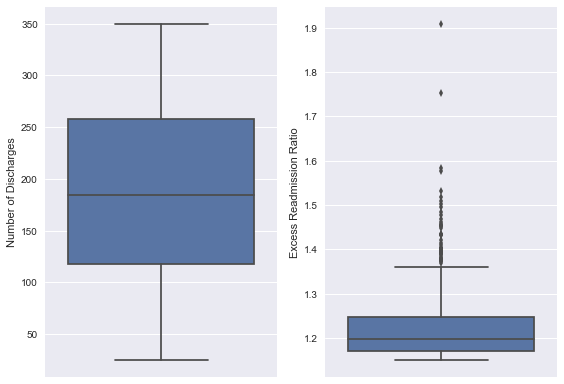

In [11]:
#Generate boxplots to visualize the distribution of the data
plt.subplot(1,2,1)
sns.boxplot(df_x_red, vert=True)

plt.subplot(1,2,2)
sns.boxplot(df_y_red, vert=True)

plt.tight_layout()
plt.show()

- The distribution in the number of discharge data looks symetrical, whereas distribution in the excess readmission ratio data obviously looks skewed. Let's do a test for normality.


In [12]:
from scipy import stats

print('df_x_red: ', stats.normaltest(df_x_red))
print('median is:', df_x_red.median())

print('\n')

print('df_y_red: ', stats.normaltest(df_y_red))
print('median is:', df_y_red.median())


df_x_red:  NormaltestResult(statistic=2449.6058115511482, pvalue=0.0)
median is: 184.0


df_y_red:  NormaltestResult(statistic=379.96156176901115, pvalue=3.1073859245180383e-83)
median is: 1.19835


- Both dy_x_red and dy_y_red are NOT normally distributed.

(b2) Perform transformations on the symmetrically distributed data and on the skewed data and re-test for normality.

df_x_red:  NormaltestResult(statistic=1228.4750625674274, pvalue=1.7379192176444531e-267)
median is: 184.0


df_y_red:  NormaltestResult(statistic=39.926042076468576, pvalue=2.1387997318365944e-09)
median is: 1.19835


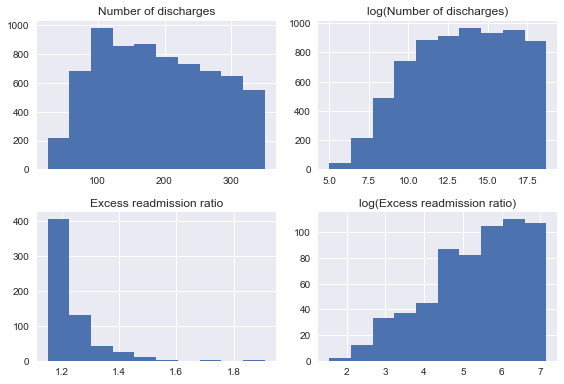

In [13]:
print('df_x_red: ', stats.normaltest(np.sqrt(df_x_red)))
print('median is:', df_x_red.median())

print('\n')

print('df_y_red: ', stats.normaltest(1/np.log(df_y_red)))
print('median is:', df_y_red.median())

#visualize distributions before and after transformation
plt.subplot(2,2,1)
plt.hist(df_x_red)
plt.title('Number of discharges')
plt.subplot(2,2,2)
plt.hist(np.sqrt(df_x_red))
plt.title('log(Number of discharges)')

plt.subplot(2,2,3)
plt.hist(df_y_red)
plt.title('Excess readmission ratio')
plt.subplot(2,2,4)
plt.hist(1/np.log(df_y_red))
plt.title('log(Excess readmission ratio)')

plt.tight_layout()
plt.show()


- Both transformations do not result in normally distributed data. 

- The next step is to do a hypothesis test of a non-normally distributed data (i.e., Wilcoxon test).

(b3) Perform a wilcoxon one sample test on the 'Excess Readmission Ratio' data
ref.: https://gist.github.com/mblondel/1761714

- Refer to **Appendix A** for the Wilcoxon test, which is done in R. 
- The Wilcoxon test rejects the null hypothesis (i.e., the median of the sample is greater than 1.0)

#### (3) Claim: With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)   
(a) Validation approach: Filter dataset for just those within the red region and calculate Pearson r and p-value 
to determine if the values that exceed 1 are outliers or not.

In [14]:
#Get only data in the green region
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)


df_x_green=df_x[(df_x>=800)&(df_x<=2500)]
df_y_green=df_y[(df_y>=0.5)&(df_y<=0.95)]

#inspect data
print(' df_x:',df_x_green.describe()) #check
print('\n df_y:',df_y_green.describe()) #check


 df_x: count     893.000000
mean     1118.846585
std       320.809619
min       800.000000
25%       886.000000
50%      1010.000000
75%      1241.000000
max      2476.000000
Name: Number of Discharges, dtype: float64

 df_y: count    2751.000000
mean        0.898060
std         0.050834
min         0.549500
25%         0.880000
50%         0.912500
75%         0.933550
max         0.950000
Name: Excess Readmission Ratio, dtype: float64


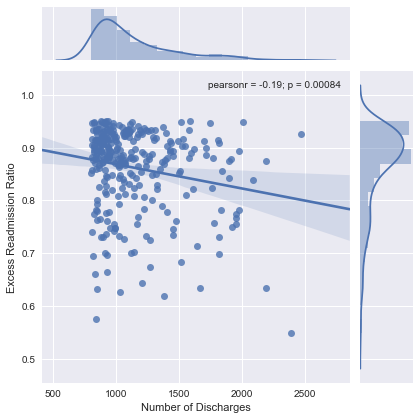

In [15]:
#calculate pearson_r and p-value to determine if there is a correlation between the two variables 

sns.jointplot(df_x_green,df_y_green, kind='reg')

plt.show()


- At -0.19, the Pearson r value is more negative than the red region. In the red region, the value is -0.091. This implies that the negative correlation is stronger in the green region.  
- However, the p-value here is less than 0.01. This means that the correlation between the two variables is insignificant.
- As before,  it is worth noting that the number of outliers look overwhelming.


(b1) The next step is to do a hypothesis test along y-axis to determine if the mean is significantly different from 1. 

The histograms of the jointplot show that the distribution of the data along the x- and the y-axes are not normally distributed. To double check, let's perform a test for normality. If distribution is not normal, attempt transformation. If unsuccessful, perform the Wilcoxon rank test.

In [16]:
#test for normality
from scipy import stats

print('df_x_green: ', stats.normaltest(df_x_green))
print('median is:', df_x_red.median())

print('\n')

print('df_y_green: ', stats.normaltest(df_y_green))
print('median is:', df_y_red.median())


df_x_green:  NormaltestResult(statistic=273.01989586382336, pvalue=5.181826745789576e-60)
median is: 184.0


df_y_green:  NormaltestResult(statistic=1133.1617232006151, pvalue=8.6508395083399413e-247)
median is: 1.19835


- The test for normality confirms that the distributions are not normal. 
- Let's now attempt transformation by appying a log function.

(b2) Apply transformation to attempt to normalize the datasets and re-test for normality.

df_x_green:  NormaltestResult(statistic=121.10170459639932, pvalue=5.0477631907532609e-27)
median is: 1010.0


df_y_green:  NormaltestResult(statistic=388.88294744286856, pvalue=3.5903840807525361e-85)
median is: 0.9125


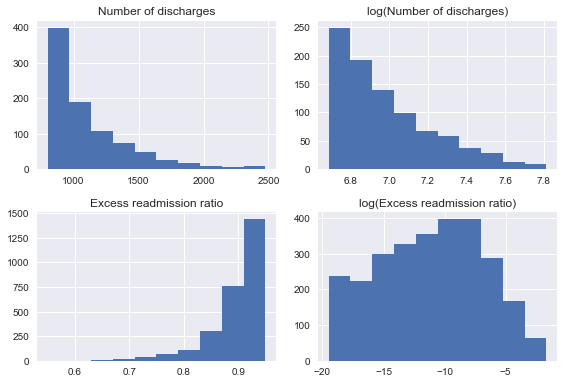

In [17]:
print('df_x_green: ', stats.normaltest(np.log(df_x_green)))
print('median is:', df_x_green.median())

print('\n')

print('df_y_green: ', stats.normaltest(1/np.log(df_y_green)))
print('median is:', df_y_green.median())

#visualize distributions before and after transformation
plt.subplot(2,2,1)
plt.hist(df_x_green)
plt.title('Number of discharges')
plt.subplot(2,2,2)
plt.hist(np.log(df_x_green))
plt.title('log(Number of discharges)')

plt.subplot(2,2,3)
plt.hist(df_y_green)
plt.title('Excess readmission ratio')
plt.subplot(2,2,4)
plt.hist(1/np.log(df_y_green))
plt.title('log(Excess readmission ratio)')

plt.tight_layout()
plt.show()


- Both transformations do not result in normally distributed data. 

- The next step is to do a hypothesis test of a non-normally distributed data (i.e., Wilcoxon test).

(b3) Perform a wilcoxon one sample test on the 'Excess Readmission Ratio' data
ref.: https://gist.github.com/mblondel/1761714

- Refer to **Appendix B** for the Wilcoxon test, which is done in R. 
- The Wilcoxon test rejects the null hypothesis (i.e., the median of the sample is less than 1.0)

**B. Statistics**  
(1) In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1   

(2) In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

(1) In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1   

In [18]:
#(1) Get data
df_xy_lt_100=df_xy[df_xy.x<100] 

df_xy_lt_100.head() #check
df_xy_lt_100.describe()

,x,y
count,1188.000000,1188.000000
mean,74.717172,1.022618
std,16.908819,0.057979
min,25.000000,0.893500
25%,62.000000,0.984900
50%,77.000000,1.017750
75%,89.000000,1.052925
max,99.000000,1.495300


In [19]:
#Determine the percentage of excess readmission rate that is greater than 1
print('The percentage of excess readmission rate that is greater than 1 is: %d %%' %(100*df_xy_lt_100[df_xy_lt_100.y>1]['y'].count()/df_xy_lt_100['y'].count()))

The percentage of excess readmission rate that is greater than 1 is: 63 %


In [20]:
#export data to csv for analysis in r
df_xy_lt_100.to_csv('data/df_xy_lt_100.csv', index=False)

- see **Appendix D** for the Wilcoxon test using r.
- At alpha=0.01, the Wilcoxon test rejects the null hypothesis (i.e., the excess readmission rate is not equal to 1.023).

(2) In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [21]:
#(2) Get data
df_xy_gt_1000=df_xy[df_xy.x>1000]

df_xy_gt_1000.head() #check
df_xy_gt_1000.describe()


,x,y
count,460.000000,460.000000
mean,1361.269565,0.979073
std,350.438731,0.119358
min,1002.000000,0.549500
25%,1107.000000,0.909025
50%,1241.000000,0.986700
75%,1508.000000,1.057100
max,2740.000000,1.454300


In [22]:
#Determine the percentage of excess readmission rate that is greater than 1
print('The percentage of excess readmission rate that is greater than 1 is: %d %%' %(100*df_xy_gt_1000[df_xy_gt_1000.y>1]['y'].count()/df_xy_gt_1000['y'].count()))

The percentage of excess readmission rate that is greater than 1 is: 44 %


In [23]:
#export data to csv for analysis in r
df_xy_gt_1000.to_csv('data/df_xy_gt_1000.csv', index=False)

- see **Appendix E** for the Wilcoxon test using r.
- At alpha=0.01, the Wilcoxon test fails to reject the null hypothesis (i.e., the excess readmission rate is equal to 0.978).

**C. Conclusions**  
(1) There is a significant correlation between hospital capacity (number of discharges) and readmission rates.   

> **Ans:** Pearson r calculation of all data concludes that there is no significant correlation between the two variables. The Pearson r value shows a weak negative correlation (i.e., -0.093). Nevertheless, the data is overwhelmed with outliers. 


(2) Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.


> **Ans:** Wilcoxon test reveals that the median for the smaller hospitals (red region) are significantly different from the median of the larger hospitals (green region). Refer to **Appendix C** for the calculation, which is done in R. Furthermore, the median for the smaller hospitals are significantly larger than 1, whereas the median for the larger hospitals are significantly smaller than 1.

**D. Regulatory policy recommendations**  
(1) Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.   

> **Ans:** I agree. This is because the Wilcoxon tests concludes that at alpha=0.01, the median of the readmission rate is greater than 1. Furthermore, the percentage excess readmission rate that is greater than 1 is more than half (i.e., 51%).   

(2) Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

> **Ans:** I agree. This is because the conclusion is that increasing te number of discharges decreases the readmission rate.  

In [24]:
#prepare data
df_xy_lt_300=df_xy[df_xy.x<1000]

#export data to csv for analysis in r
df_xy_lt_300.to_csv('data/df_xy_lt_300.csv', index=False)

#check the percentage of excess readmission rate for hospitals with number of discharges less than 300  
print('The percentage of excess readmission rate that is greater than 1 is: %d %%' %(100*df_xy_lt_300[df_xy_lt_300.y>1]['y'].count()/df_xy_lt_300['y'].count()))

The percentage of excess readmission rate that is greater than 1 is: 51 %


- see **Appendix F** for the Wilcoxon test using r.
- At alpha=0.01, the Wilcoxon test rejects the null hypothesis (i.e., the excess readmission rate is greater than 1).

### II. Answer the questions based on the validation results

A. Do you agree with the above analysis and recommendations? Why or why not?
   
   > Ans: Based on the result of the hypothesis test, I agree that there is a difference in the median between the low and 
   the high number of discharges with the low number of discharges having a readmission rate above 1 and the high number 
   of discharges having a readmission rate below 1. However, based on the p-value of the Pearson correlation test I 
   disagree than the two variables are significantly correlated.
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:  
1.) Setup an appropriate hypothesis test.   
2.) Compute and report the observed significance value (or p-value).  
3.) Report statistical significance for $\alpha$ = .01.   
4.) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?  

> Ans.: Questions B1 thru B4 have been addressed in the above.
   
5.) Look at the scatterplot above.   
-What are the advantages and disadvantages of using this plot to convey information?    
> Ans: A disadvantaga to a scatter plot is that it conveys information discretely. When the data is sparse, the trend could be misleading. An advantage is that it reveals the density of the data points across the whole data set. Hence, the region in which there are outliers becomes obvious when depicted as a scatter plot.    

-Construct another plot that conveys the same information in a more direct manner.    
      
> Ans: As an alternative to the scatter plot, I have generated a jointplot using seaborn. The jointplot includes a linear model to fit to the scatter plot. It also adds histograms to show the distribution of the scatter data long the x- and the y- axes.
